___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Plotly and Cufflinks

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

In [30]:
import pandas as pd
import numpy as np
%matplotlib inline

In [31]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

6.3.0


In [32]:
import cufflinks as cf

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

# Make Plotly render inside the notebook
pio.renderers.default = 'notebook'

In [34]:
# For Notebooks
init_notebook_mode(connected=True)

In [35]:
# For offline use
cf.go_offline()

### Fake Data

In [36]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [37]:
df.head()

,A,B,C,D
0,1.682586,-0.965942,-0.143750,0.633333
1,0.154934,-0.186549,-0.645446,0.131268
2,-0.237552,0.929475,0.552145,-0.637705
3,-0.428918,1.038439,-0.944098,1.067596
4,0.768386,0.745968,-0.159376,0.075432


In [38]:
df2 = pd.DataFrame({'Category':['A','B','C'],'Values':[32,43,50]})

In [39]:
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


## Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

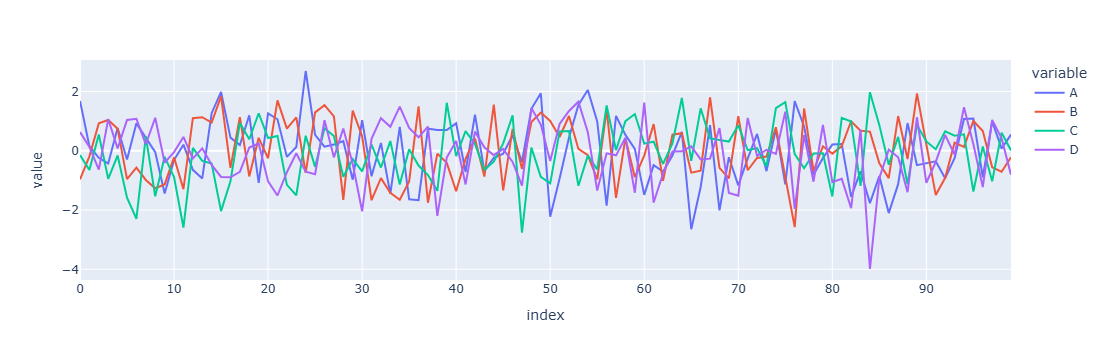

In [40]:
px.line(df)

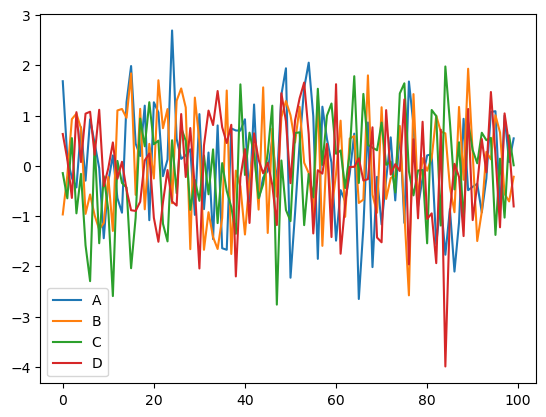

In [42]:
plt.close()
df.plot()
plt.show()

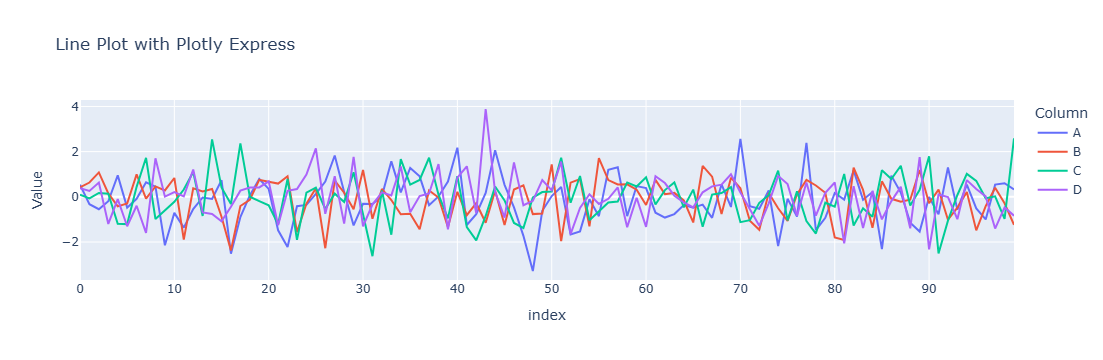

In [44]:
import pandas as pd
import numpy as np
import plotly.express as px

# Sample data
df = pd.DataFrame(np.random.randn(100, 4), columns=['A','B','C','D'])

# Convert the dataframe to long format for Plotly Express
df_long = df.reset_index().melt(id_vars='index', var_name='Column', value_name='Value')

# Line chart
fig = px.line(df_long, x='index', y='Value', color='Column', title='Line Plot with Plotly Express')
fig.show()

## Scatter

In [ ]:
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=10)

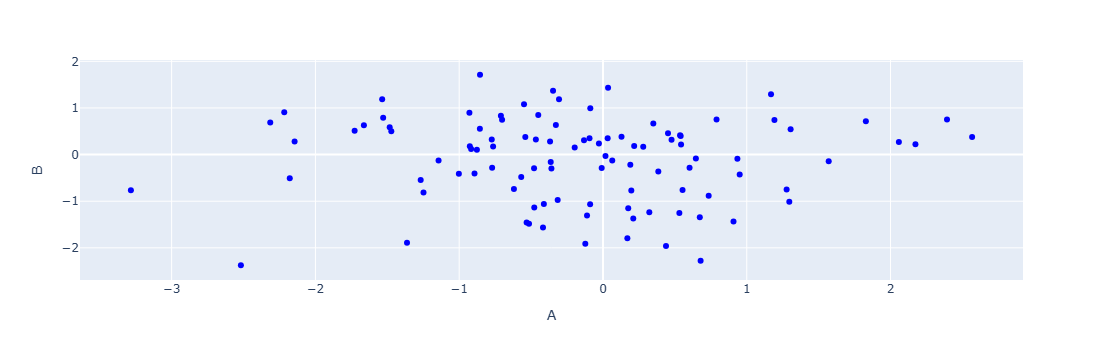

In [49]:
fig = px.scatter(df, x='A', y='B', size_max=10, color_discrete_sequence=['blue'])
fig.show()

## Bar Plots

In [ ]:
df2.iplot(kind='bar',x='Category',y='Values')

In [ ]:
df.count().iplot(kind='bar')

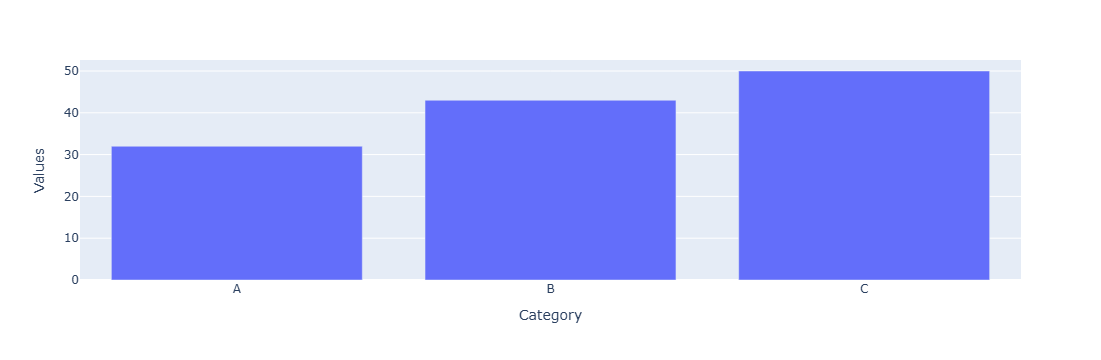

In [52]:
fig = px.bar(df2, x='Category', y='Values')
fig.show()

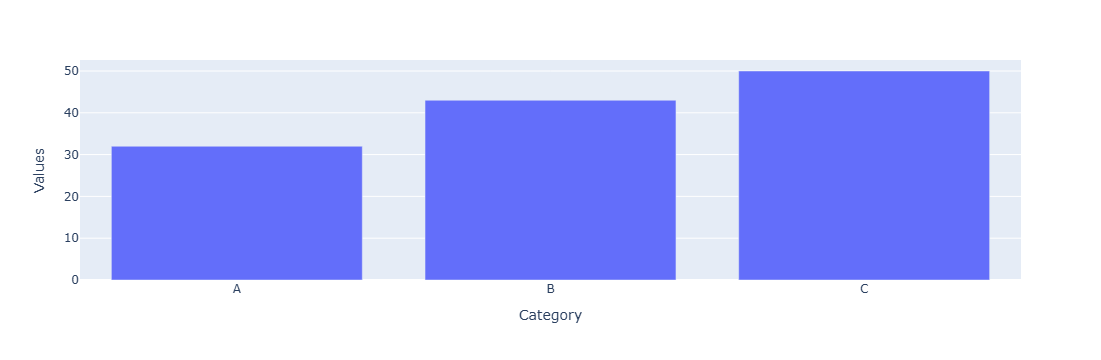

In [60]:
# Your DataFrame
df2 = pd.DataFrame({'Category':['A','B','C'], 'Values':[32,43,50]})

# Bar plot
fig = px.bar(df2, x='Category', y='Values')
fig.show()

## Boxplots

In [ ]:
df.iplot(kind='box')

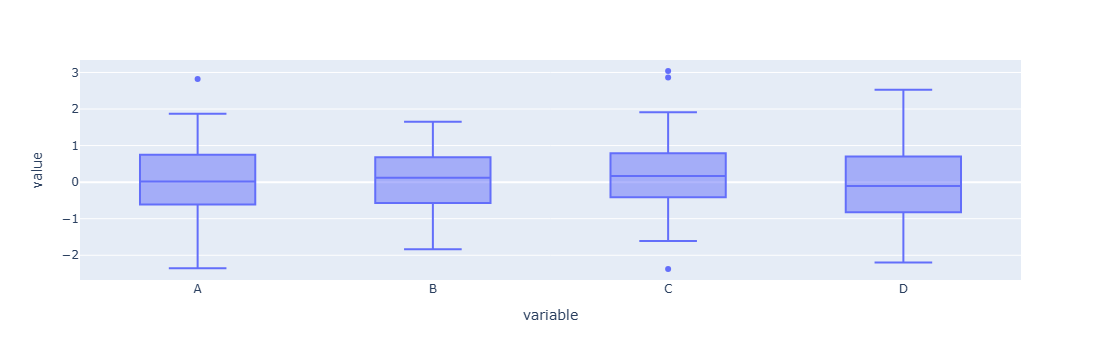

In [66]:
fig = px.box(df, y=df.columns) 
fig.show()

## 3d Surface

In [ ]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3.iplot(kind='surface',colorscale='rdylbu')

In [68]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3

,x,y,z
0,1,10,5
1,2,20,4
2,3,30,3
3,4,20,2
4,5,10,1


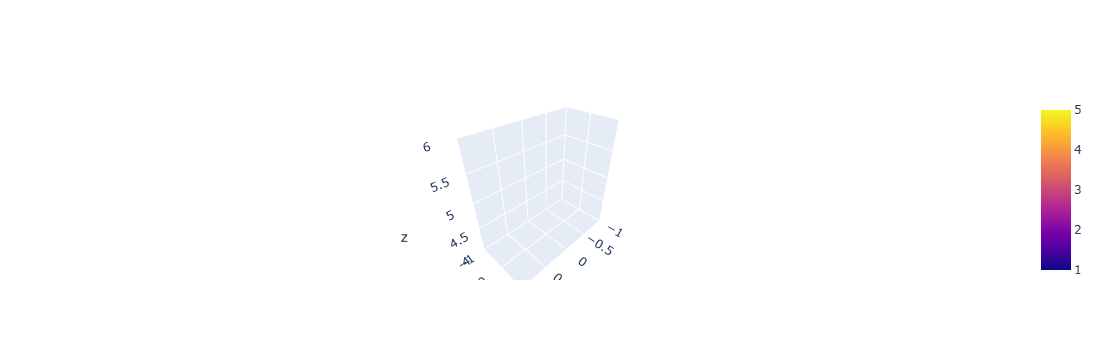

In [72]:
import pandas as pd
import plotly.graph_objects as go

df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3
# Pivot to matrix form for surface plot
z_matrix = df3.pivot_table(index='y', columns='x', values='z').values

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=z_matrix)])
fig.show()


## Spread

In [ ]:
df[['A','B']].iplot(kind='spread')

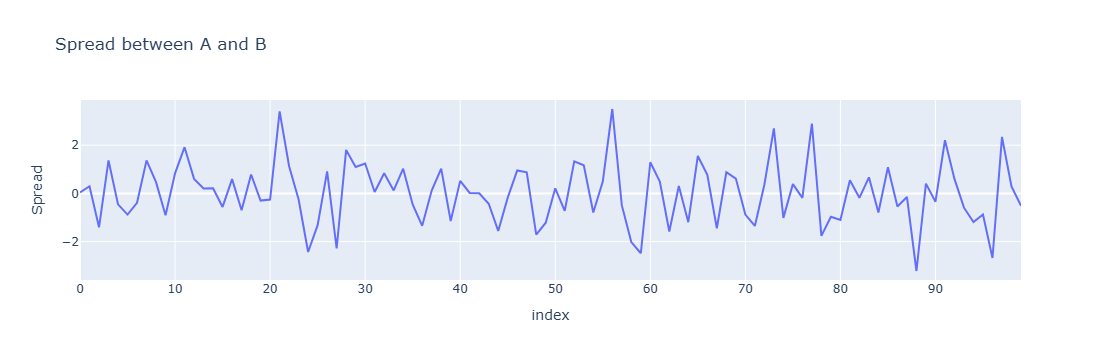

In [74]:
# Compute the spread (difference between columns)
df['Spread'] = df['A'] - df['B']

# Plot the spread
fig = px.line(df, y='Spread', title='Spread between A and B')
fig.show()

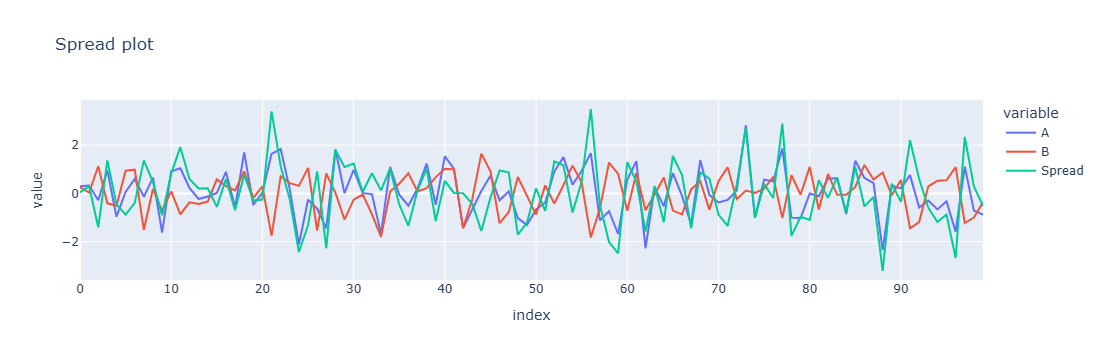

In [79]:
# Calculate the spread
df['Spread'] = df['A'] - df['B']

# Plot A, B, and Spread together
fig = px.line(df, y=['A','B','Spread'], title='Spread plot')
fig.show()

## histogram

In [ ]:
df['A'].iplot(kind='hist',bins=25)

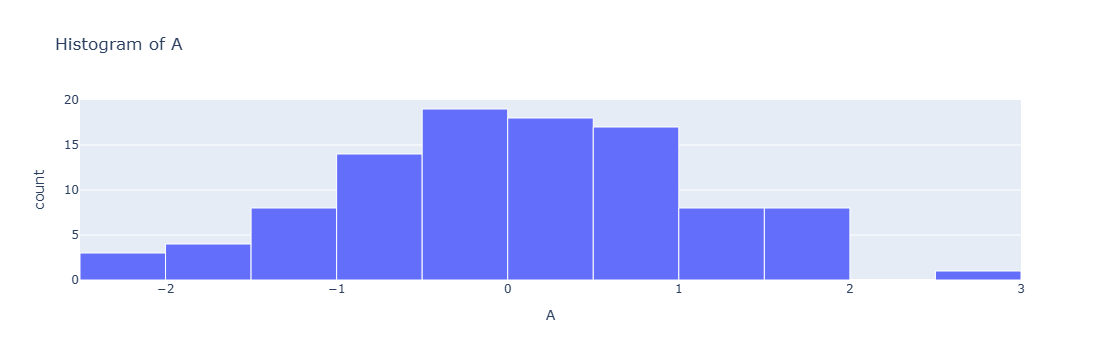

In [77]:
fig = px.histogram(df, x='A', nbins=25, title='Histogram of A')

# Add white lines between bars
fig.update_traces(marker_line_color='white', marker_line_width=1)

fig.show()

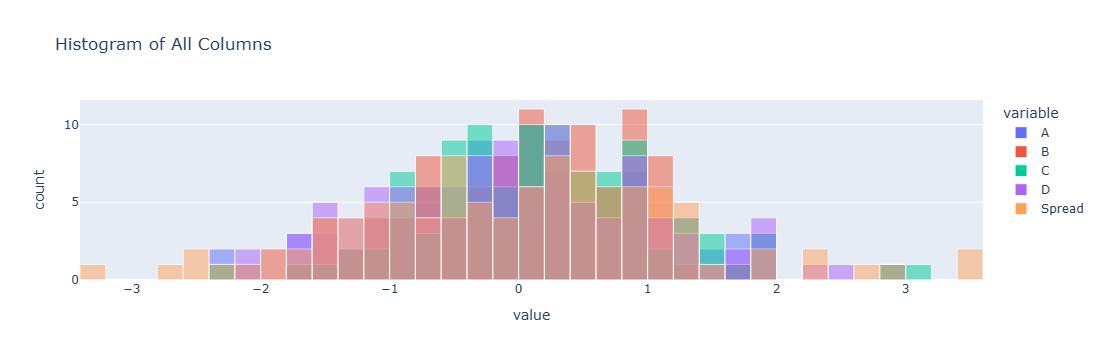

In [78]:
fig = px.histogram(df, x=df.columns, barmode='overlay', title='Histogram of All Columns')
fig.update_traces(marker_line_color='white', marker_line_width=1)
fig.show()

In [ ]:
df.iplot(kind='bubble',x='A',y='B',size='C')

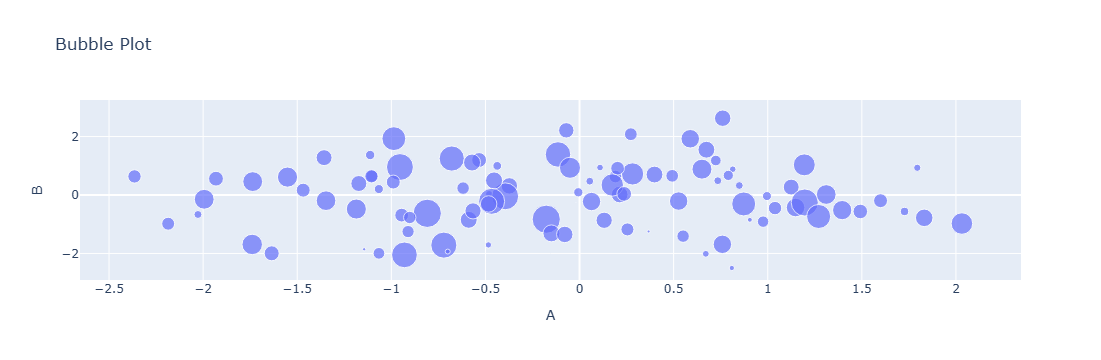

In [81]:
import plotly.express as px
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(100, 3), columns=['A','B','C'])

fig = px.scatter(df, x='A', y='B', size=df['C'].abs(), title='Bubble Plot')
fig.show()

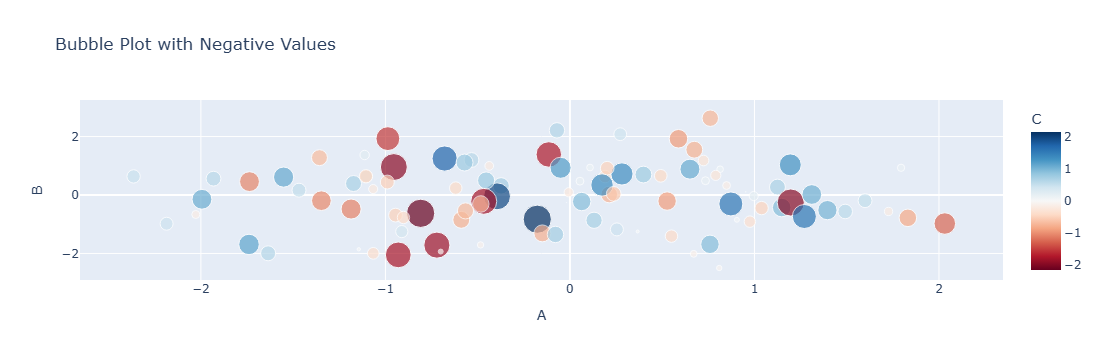

In [83]:
# Bubble plot: use absolute value for size, color for sign
fig = px.scatter(
    df,
    x='A',
    y='B',
    size=df['C'].abs(),           # bubble radius always positive
    color='C',                    # negative values shown via color
    color_continuous_scale='RdBu',# blue=negative, red=positive
    title='Bubble Plot with Negative Values'
)

fig.show()

## scatter_matrix()

Similar to sns.pairplot()

In [ ]:
df.scatter_matrix()

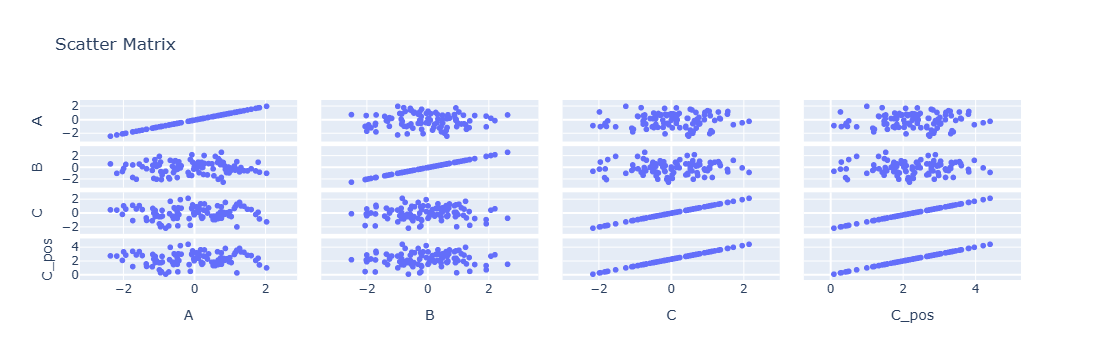

In [84]:
# Scatter matrix
fig = px.scatter_matrix(df,
                        dimensions=df.columns,  # which columns to include
                        color=None,             # optional: color by a column
                        title='Scatter Matrix')
fig.show()

# Great Job!